In [2]:
import os
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import ticker
from PIL import Image 

## Ingresar escenario :

In [30]:
escen = 2 # 1, 4, 3 ,8

In [31]:
path = os.getcwd()
folder= path + "/dataset/series_boyas/tsE"+str(escen)+'/'
#folder = path+"/dataset/ts_jorge_MW8.6/"
print(folder)

/home/jorge/tsunami-warning/dataset/series_boyas/tsE2/


<img src="L3_Vdat.png" alt="alt text" width="2000">


In [32]:
files = []
for file in os.listdir(folder):
    if file.endswith(".nc"):
        files.append(file)
files.sort()
print(files[0:10])

['layer01_tsE02_88.nc']


## Se visualiza la imagen con las boyas graficadas
Para tener un apoyo vizual de la ubicación de cada una de estas.

In [33]:
I = Image.open(path+"/dataset/boyas/L3_Vdat.png",'r')
I.show()

## Boyas Altura de ola e inundacion valpo-viña.

In [34]:
b_valpo = [3,4,6,21] # boyas altura de ola valpo

b_vina = [15,16,18] # boyas altura de ola viña

i_valpo = [0,1,7] # boyas altura de inundacion valpo

i_vina = [9,13] # boyas altura de inundacion viña

# diccionarios boyas mar e inundación
boyas = {'boyas Valparaiso':b_valpo,'boyas Viña':b_vina,'inundacion Valparaiso':i_valpo,'inundacion Viña':i_vina}

In [35]:
boyas

{'boyas Valparaiso': [3, 4, 6, 21],
 'boyas Viña': [15, 16, 18],
 'inundacion Valparaiso': [0, 1, 7],
 'inundacion Viña': [9, 13]}

In [36]:
for tipo_boya, boya in boyas.items():
    print(tipo_boya, ' ', boya)

boyas Valparaiso   [3, 4, 6, 21]
boyas Viña   [15, 16, 18]
inundacion Valparaiso   [0, 1, 7]
inundacion Viña   [9, 13]


## Gráficos series de tiempo.

/home/jorge/tsunami-warning/dataset/series_boyas/tsE2/boyas Valparaiso
/home/jorge/tsunami-warning/dataset/series_boyas/tsE2/boyas Valparaiso
/home/jorge/tsunami-warning/dataset/series_boyas/tsE2/boyas Valparaiso
/home/jorge/tsunami-warning/dataset/series_boyas/tsE2/boyas Valparaiso


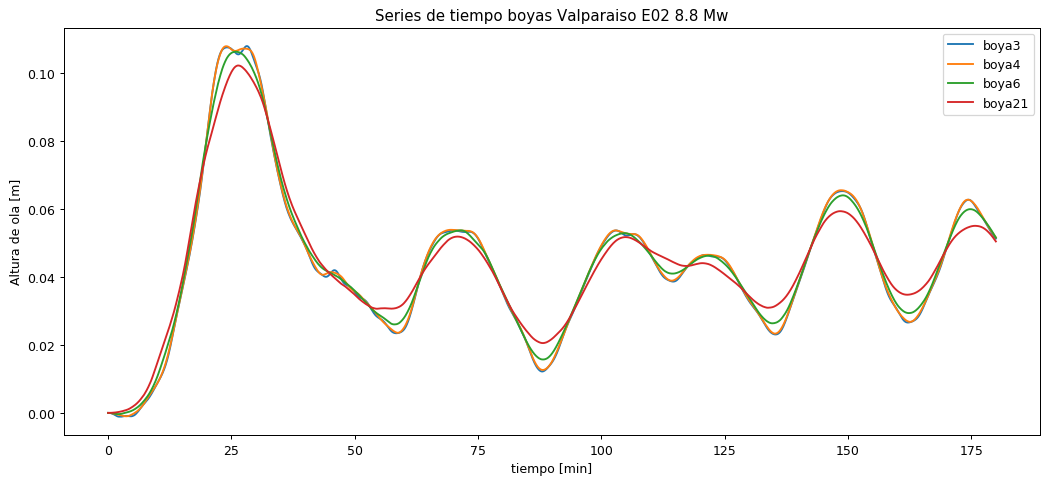

/home/jorge/tsunami-warning/dataset/series_boyas/tsE2/boyas Viña
/home/jorge/tsunami-warning/dataset/series_boyas/tsE2/boyas Viña
/home/jorge/tsunami-warning/dataset/series_boyas/tsE2/boyas Viña


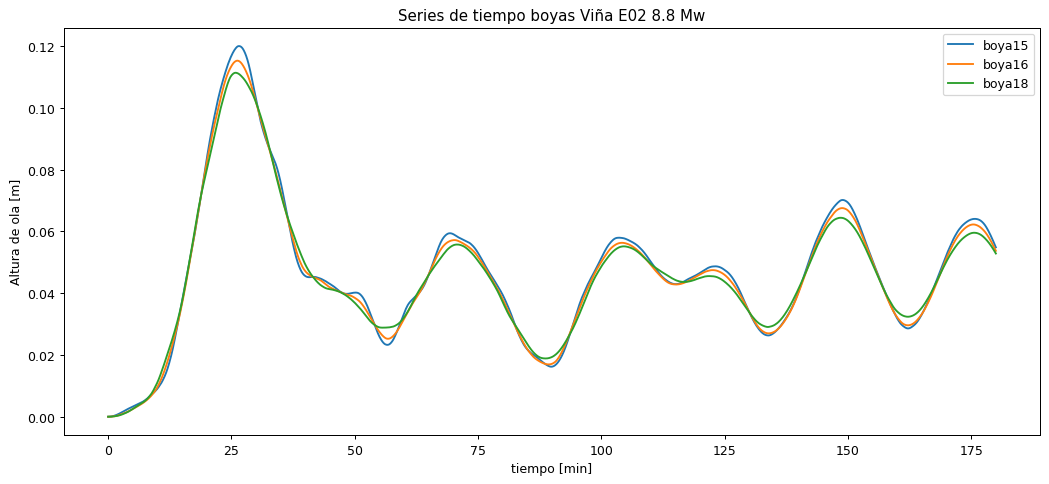

/home/jorge/tsunami-warning/dataset/series_boyas/tsE2/inundacion Valparaiso
/home/jorge/tsunami-warning/dataset/series_boyas/tsE2/inundacion Valparaiso
/home/jorge/tsunami-warning/dataset/series_boyas/tsE2/inundacion Valparaiso


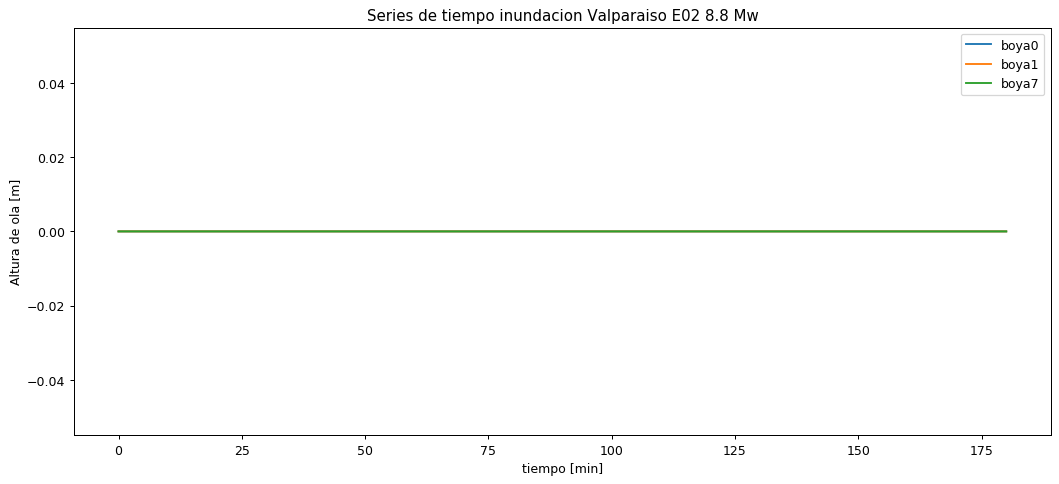

/home/jorge/tsunami-warning/dataset/series_boyas/tsE2/inundacion Viña
/home/jorge/tsunami-warning/dataset/series_boyas/tsE2/inundacion Viña


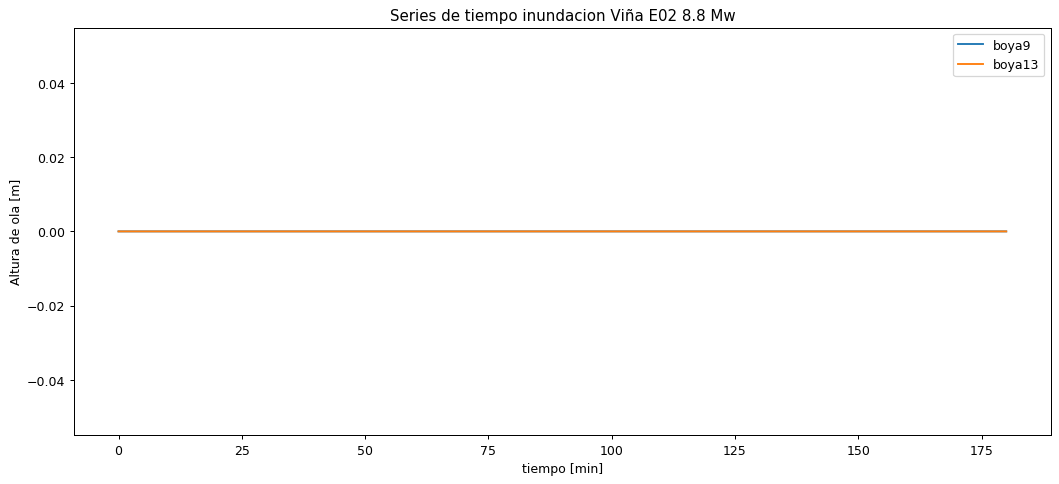

In [37]:
for file in files[0:3]:
    rutafile = folder  + file
    f=Dataset(rutafile,'r') # abrir file
    for tipo_boya, boya in boyas.items():
        figure = plt.figure(figsize=(14,6), dpi=90)
        for i in boya:
            time = f.variables['time'][:]/60 
            eta = f.variables['eta'][:,i] -f.variables['eta'][:,i][0]# inundacion
            plt.plot(time,eta,label = 'boya'+str(i))
            plt.title('Series de tiempo '+tipo_boya +' '+ file[-9:-6] +' '+ file[-5]+'.'+file[-4]+' Mw')
            plt.ylabel('Altura de ola [m]')
            plt.ylabel('Altura de ola [m]')
            plt.xlabel('tiempo [min]')
            plt.legend(loc='upper right')
            folderout = folder+ tipo_boya
            print(folderout)
            if not os.path.exists(folderout): # crea folder si no existe
                os.makedirs(folderout)

            figure.savefig(folderout+'/'+file.split('.nc')[0]+'.png',
                           dpi=300,bbox_inches = 'tight',pad_inches = 0)
        plt.show()

In [6]:
path = os.getcwd()
folder1= path + "/dataset/esc221-9.0Mw/level0/"
folder2= path + "/dataset/esc221-9.0Mw/level2/"
file = 'level01_ts.nc'

rutafile1 = folder1  + file
f1=Dataset(rutafile1,'r') # abrir file

rutafile2 = folder2  + file
f2=Dataset(rutafile2,'r') # abrir file

/home/jorge/tsunami-warning/dataset/esc221-9.0Mw/level0/


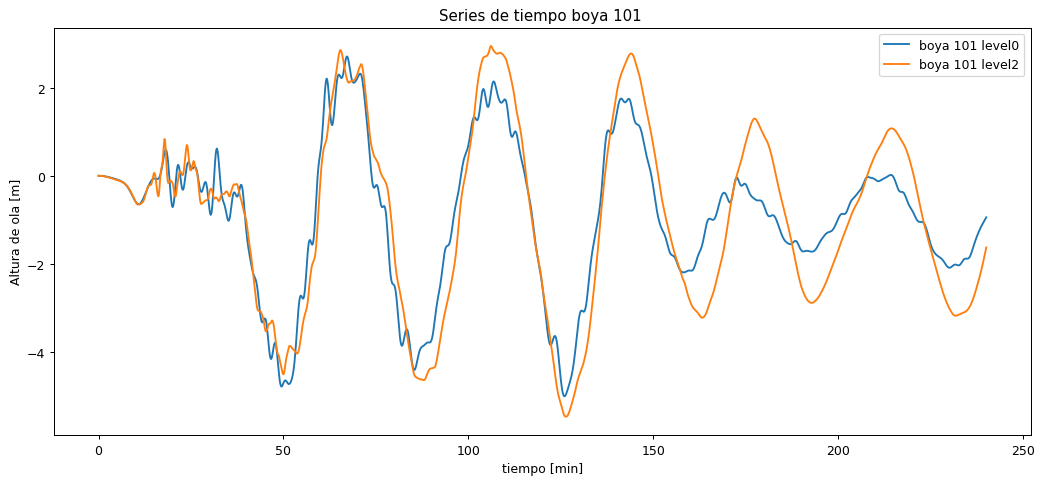

In [7]:

figure = plt.figure(figsize=(14,6), dpi=90)

time1 = f1.variables['time'][:]/60 
eta1 = f1.variables['eta'][:,101] -f1.variables['eta'][:,101][0]# inundacion
time2 = f2.variables['time'][:]/60 
eta2 = f2.variables['eta'][:,101] -f2.variables['eta'][:,101][0]# inundacion
plt.plot(time1,eta1,label = 'boya '+str(101)+' level0')
plt.plot(time2[0:len(eta1)],eta2[0:len(eta1)],label = 'boya '+str(101)+ ' level2')
plt.title('Series de tiempo boya 101 ')
plt.ylabel('Altura de ola [m]')
plt.ylabel('Altura de ola [m]')
plt.xlabel('tiempo [min]')
plt.legend(loc='upper right')
folderout = folder1
print(folderout)
if not os.path.exists(folderout): # crea folder si no existe
    os.makedirs(folderout)

figure.savefig(folderout+'/'+file.split('.nc')[0]+'.png',
               dpi=300,bbox_inches = 'tight',pad_inches = 0)
plt.show()

/home/jorge/tsunami-warning/dataset/esc307-9.2Mw/level0/


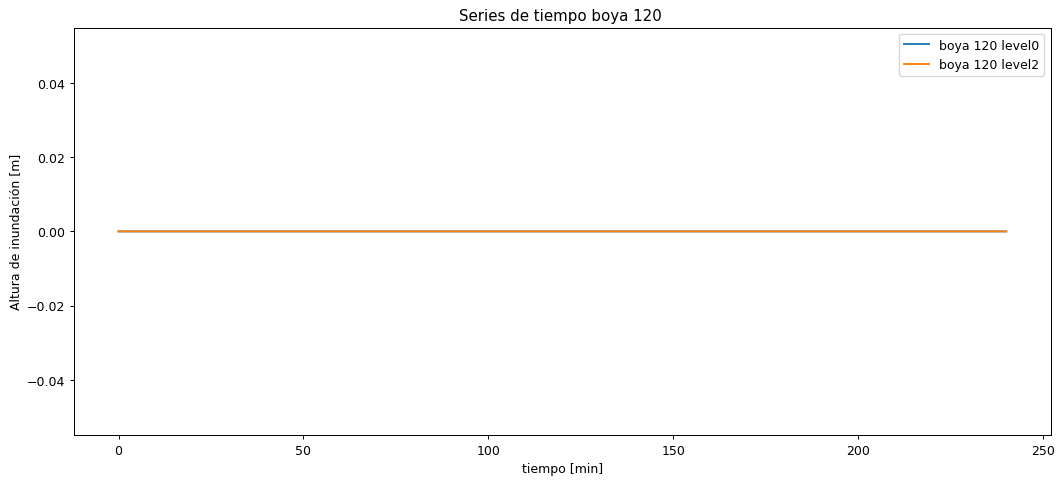

In [28]:
figure = plt.figure(figsize=(14,6), dpi=90)

time1 = f1.variables['time'][:]/60 
eta1 = f1.variables['eta'][:,120] -f1.variables['eta'][:,120][0]# inundacion
time2 = f2.variables['time'][:]/60 
eta2 = f2.variables['eta'][:,120] -f2.variables['eta'][:,120][0]# inundacion
plt.plot(time1,eta1,label = 'boya '+str(120)+' level0')
plt.plot(time2[0:len(eta1)],eta2[0:len(eta1)],label = 'boya '+str(120)+ ' level2')
plt.title('Series de tiempo boya 120 ')
plt.ylabel('Altura de inundación [m]')

plt.xlabel('tiempo [min]')
plt.legend(loc='upper right')
folderout = folder1
print(folderout)
if not os.path.exists(folderout): # crea folder si no existe
    os.makedirs(folderout)

figure.savefig(folderout+'/'+file.split('.nc')[0]+'.png',
               dpi=300,bbox_inches = 'tight',pad_inches = 0)
plt.show()

In [20]:
len(eta2)

5761

In [19]:
len(eta)

1441